In [504]:
from vectorflow.classical.rbm import RBM
import numpy as np
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [518]:
h = 20 # Total number of hidden units
v = 10 # Total number of Visible units
d=20 # number of training data points
data = np.random.rand(d, v) <0.5 # Training data 

rbm = RBM(v,h) # Create RBM with total h hidden units and v visible units


In [519]:
rbm.fit(data, epochs=50) # Fit the RBM

In [520]:
# Testing RBM by sending fraction of data 
k = 1
acc = 0
for each in range(d):
    s =rbm.retrieve(data[each,:int(v/k)])
    #print("\nInput:",data[each,:int(v/k)])
    #print("expected:",data[each])
    #print("output:",s)
    #print("accuracy:", np.mean(s==data[each]))
    acc += np.mean(s==data[each,:])
print("Accuracy:", round(acc*100/d), "%")

Accuracy: 100.0 %


# MNIST

In [616]:
import scipy.io
from load_data import download
download("./mnist-original.mat", "https://raw.githubusercontent.com/amplab/datascience-sp14/master/lab7/mldata/mnist-original.mat", False)
mat = scipy.io.loadmat('mnist-original.mat')
X = mat["data"].T

X_train = X.reshape(X.shape[0], 1, 28, 28)[:,:,0::2,0::2].reshape(X.shape[0], -1) > 128
randomize = np.arange(X.shape[0])
np.random.shuffle(randomize)
X_train = X_train[randomize]

./mnist-original.mat already exists, skipping ...


In [625]:
h = 100 # Total number of hidden units
v = 196 # Total number of Visible units
d = 100
data = X_train[:d,:]
rbm = RBM(v,h) # Create RBM with total h hidden units and v visible units

In [626]:
rbm.fit(data, epochs=10) # Fit the RBM

In [627]:
# Testing RBM by sending fraction of data 
k = 1
acc = 0
rs = []
for each in range(d):
    s =rbm.retrieve(data[each,:int(v/k)])
    rs.append(s)
    #print("\nInput:",data[each,:int(v/k)])
    #print("expected:",data[each])
    #print("output:",s)
    #print("accuracy:", np.mean(s==data[each]))
    acc += np.mean(s==data[each,:])
print("Accuracy:", round(acc*100/d), "%")

Accuracy: 94.0 %


Original:


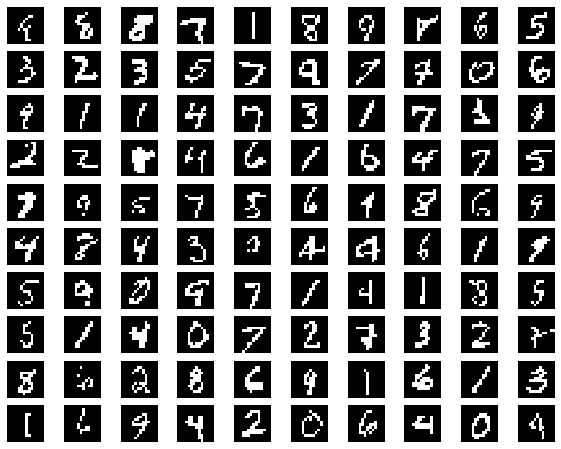

Reconstructed:


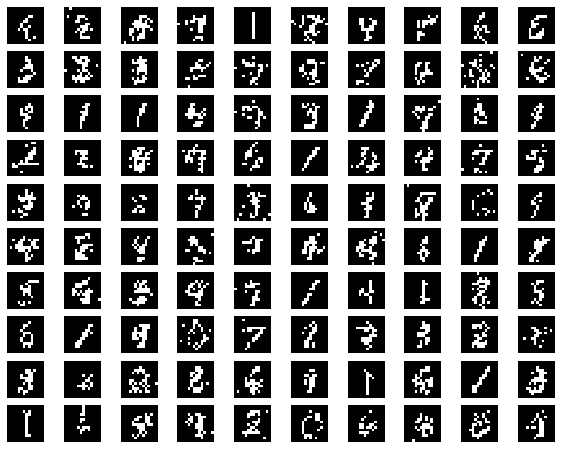

In [630]:
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Original
print("Original:")
for i in range(d):
    im = data[i,:].reshape(14, 14)
    plt.subplot(10, 10, i+1)
    plt.imshow(im.astype('uint8'))
    plt.axis('off')
plt.show()
print("Reconstructed:")
for i in range(d):
    im = rs[i].reshape(14, 14)
    plt.subplot(10, 10, i+1)
    plt.imshow(im.astype('uint8'))
    plt.axis('off')

plt.show()